In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## One Condition HDDM

#### Load the data and and check data

In [2]:
# Load data from csv file into a NumPy structured array
dataAll = hddm.load_csv('./rt_dataframes/all.csv')
dataAll.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,27902f23b60a7b76,2238.0,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1924.0,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1415.0,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2014.0,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1082.0,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1223.0,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1115.0,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1124.0,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1712.0,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1345.0,0.0,102,12.0,0.0,4.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataAll = dataAll.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAll['rt'] = dataAll['rt'] / 1000
dataAll.head(10)


,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,27902f23b60a7b76,2.238,1.0,102,14.0,0.0,6.0,1.0
1,27902f23b60a7b76,1.924,1.0,101,15.0,-5.0,0.0,1.0
2,27902f23b60a7b76,1.415,0.0,101,13.0,-3.0,0.0,1.0
3,27902f23b60a7b76,2.014,1.0,102,8.0,0.0,3.0,1.0
4,27902f23b60a7b76,1.082,1.0,102,12.0,0.0,6.0,1.0
5,27902f23b60a7b76,1.223,1.0,101,12.0,-3.0,0.0,1.0
6,27902f23b60a7b76,1.115,0.0,102,14.0,0.0,4.0,1.0
7,27902f23b60a7b76,1.124,0.0,102,12.0,0.0,3.0,1.0
8,27902f23b60a7b76,1.712,0.0,101,20.0,-8.0,0.0,1.0
9,27902f23b60a7b76,1.345,0.0,102,12.0,0.0,4.0,1.0


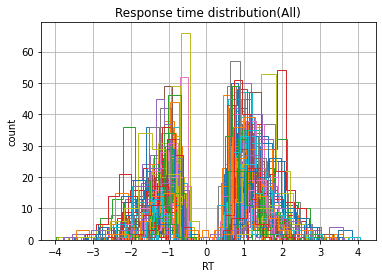

In [4]:
#flip the error RTs to be negative
dataAll = hddm.utils.flip_errors(dataAll)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(All)')
for i, subj_data in dataAll.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
plt.savefig('./fitting_results/HDDM/HDDM1C/rt_distribution(All).png')

## Fitting the hierarchical model for one condition with no subject effects

In [6]:
# default model with 4 parameters v,a,z,t, exclude st, sz, eta
m = hddm.HDDM(dataAll, include=('v', 'a', 'z', 't'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM1C/traces(1C).db', db='pickle')
m.save('./fitting_results/HDDM/HDDM1C/model(1C)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 1154.7 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std


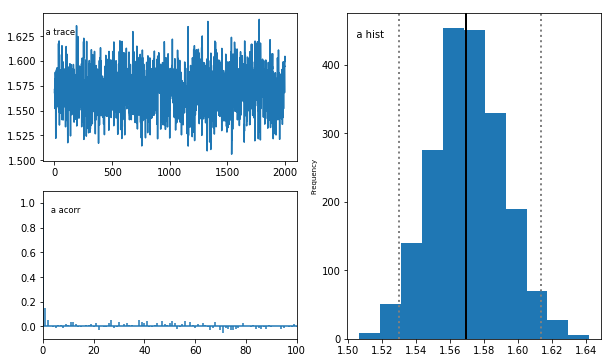

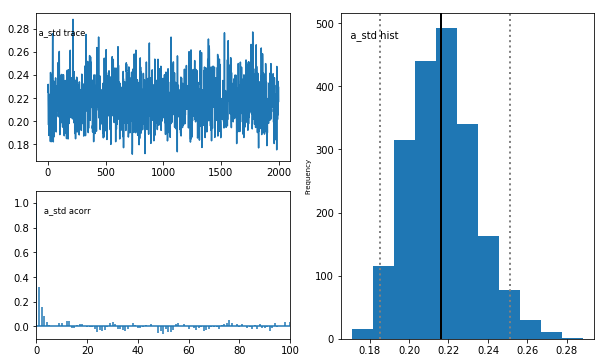

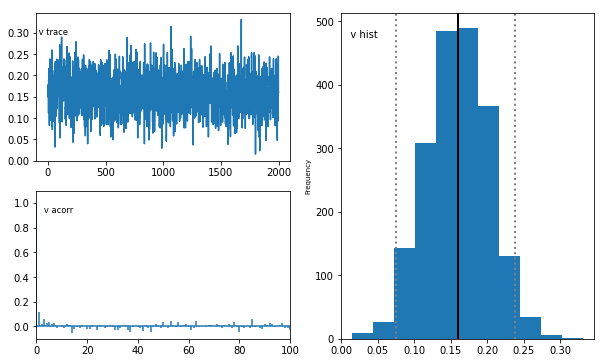

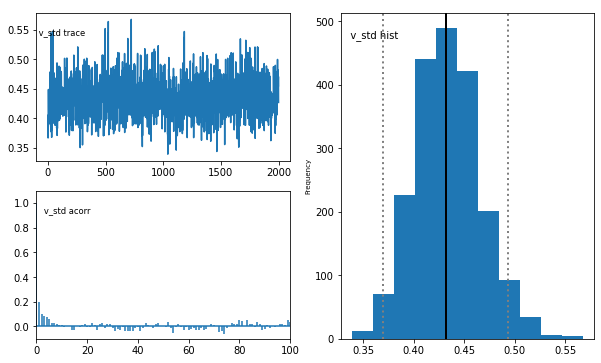

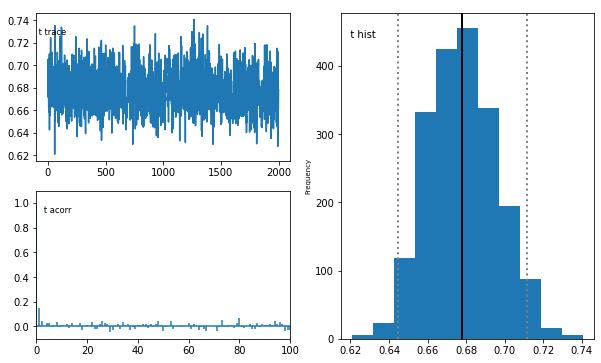

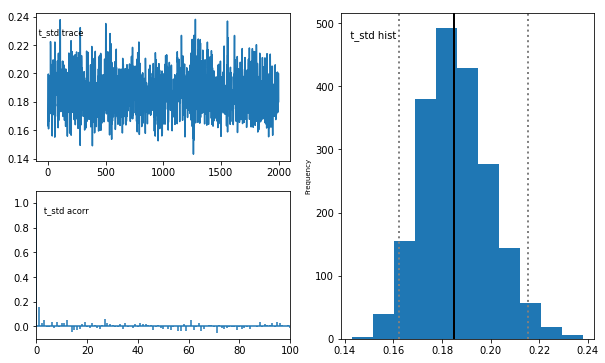

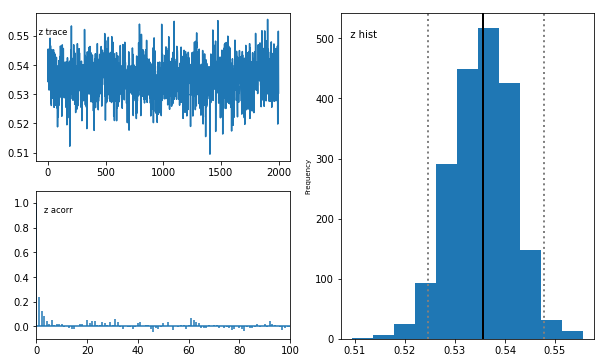

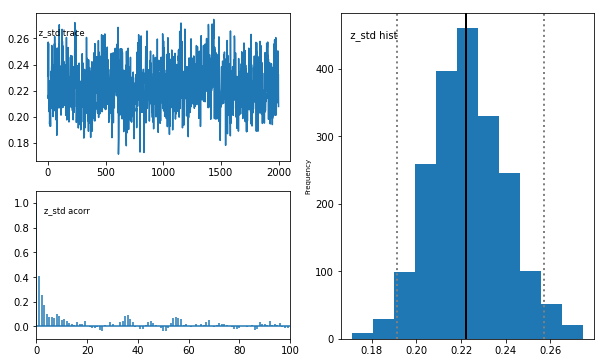

In [7]:
#plot posterior samples
m.plot_posteriors(['a', 't', 'v', 'a_std', 'v_std','z', 'z_std','t_std'])

In [8]:
stats1C = m.gen_stats()
stats1C[stats1C.index.isin(['a', 'a_std', 'v', 'v_std', 't', 't_std', 'z', 'z_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.5702,0.0209665,1.5282,1.55627,1.56939,1.5849,1.61189,0.000580399
a_std,0.216997,0.0171619,0.186304,0.204708,0.216113,0.227525,0.253675,0.000576231
v,0.160353,0.0426974,0.0775585,0.131291,0.160347,0.190459,0.243143,0.00117307
v_std,0.434083,0.0325171,0.376022,0.41156,0.432205,0.454617,0.501941,0.00100532
t,0.678242,0.0177628,0.645782,0.66528,0.677661,0.690538,0.713448,0.000480344
t_std,0.186083,0.0139315,0.161724,0.176314,0.184995,0.194872,0.215208,0.000385247
z,0.535531,0.00607476,0.523481,0.531329,0.535698,0.539838,0.5469,0.000190907
z_std,0.223188,0.0167173,0.192629,0.211584,0.222207,0.234388,0.258878,0.000696714


## Check for Model convergence

In [8]:
# Set up models list to append results
models = list()

In [9]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,include=('v', 'a', 'z', 't'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM1C/chain_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM1C/chain1CCon_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [10]:
num_chains = 5
data_chains = [(dataAll,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models = pool.starmap(fit_hddm_chain, data_chains)

Fitting chain 0
Fitting chain 1
Fitting chain 2
Fitting chain 3
Fitting chain 4


/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------97%----------------- ] 2934 of 3000 complete in 1043.4 sec              0%                  ] 3 of 3000 complete in 0.8 sec[                  0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 3 of 3000 complete in 0.7 sec[                  0%                  ] 3 of 3000 complete in 0.8 sec[                  0%                  ] 4 of 3000 complete in 1.3 sec[                  0%                  ] 4 of 3000 complete in 1.3 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 5 of 3000 complete in 1.6 sec[                  0%                  ] 5 of 3000 complete in 1.7 sec[                  0%                  ] 6 of 3000 complete in 2.1 sec[                  0%                  ] 6 of 3000 complete in 2.2 sec[                  0%                  ] 7 of 3000 complete in 2.4 sec[                  0%                  ] 7 of 3000 complete in 2.4 sec[                  

In [11]:
for i, model in enumerate(models):
    model.save(f'./fitting_results/HDDM/HDDM1C/chain_{i}')
print('Finished all chains')

Finished all chains


In [5]:
#check for model loading
models

NameError: name 'models' is not defined

In [13]:
# check model convergence
results = hddm.analyze.gelman_rubin(models)
print(results)

{'a': 1.0002692580483032, 'a_std': 1.0006719110182953, 'a_subj.00aa64fdcb675341': 1.0009070452436803, 'a_subj.02535fcf7e16bb56': 1.0102582194886363, 'a_subj.06c46b112368babf': 1.0000622879394823, 'a_subj.09ba82a2ca814481': 1.0005948772997735, 'a_subj.0abfc32a4d12c731': 0.9999379546251602, 'a_subj.0b0a94c202d0b233': 1.000684379444365, 'a_subj.0beac20378edac7b': 0.9999742539338436, 'a_subj.0d894551bc966608': 1.0009654147200497, 'a_subj.10d15198ac61a404': 1.0002277980390313, 'a_subj.12a096342c4d052f': 1.0002038534123072, 'a_subj.13e347e32a454872': 0.9999795809502424, 'a_subj.15e0c065b2c11595': 1.0001257343154175, 'a_subj.163b12703c8e5c3c': 1.0000723683291857, 'a_subj.1bf86ff948486447': 1.0000159577145296, 'a_subj.1cb976bac3a2016b': 1.000039325769417, 'a_subj.1ffdcfc59b83c43a': 1.0002048988242693, 'a_subj.221e9f16c114b2c0': 0.9998176133815362, 'a_subj.22d84796012679e8': 1.0002480978094135, 'a_subj.247384e4eccc4f80': 1.0001427491297812, 'a_subj.2737c4b829b3018f': 1.0003607671342163, 'a_subj